# Learning outcomes

When you've worked through the exercise in this notebook, you'd have

* built and evaluated tree-based and kNN models using a standard software library;

* run experiments to explore effects of differing feature scales on machine learning models.

# Objectives


* To apply k-nearest neighbour (kNN) and Bagging algorithms from Week 2 mini-videos to classification of Iris plants based on petal and sepal sizes. This was the same dataset introduced in the Week 1 code notebook.

# Section 1 - Load the Iris dataset

In [3]:
from sklearn import datasets

iris_data, iris_labels = datasets.load_iris(return_X_y=True, as_frame=False)

print("The dimensions of the Iris feature matrix", iris_data.shape)

The dimensions of the Iris feature matrix (150, 4)


# Section 2 - Split into training and test sets

In [18]:
from sklearn.model_selection import train_test_split
import numpy

all_ids = numpy.arange(0, iris_data.shape[0])

random_seed = 1

# Rrandomly split the data into 50:50 to get the training set
train_set_ids, test_set_ids = train_test_split(all_ids, test_size=0.5, train_size=0.5,
                                 random_state=random_seed, shuffle=True)

training_data = iris_data[train_set_ids, :]
training_labels = iris_labels[train_set_ids]
test_data = iris_data[test_set_ids, :]
test_labels = iris_labels[test_set_ids]

print("Size of the training data:", training_data.shape)
print("Size of the test data:", test_data.shape)
print("A peek at the range of values of the training data features:", training_data)

Size of the training data: (75, 4)
Size of the test data: (75, 4)
A peek at the range of values of the training data features: [[6.4 2.9 4.3 1.3]
 [6.5 3.  5.5 1.8]
 [5.  2.3 3.3 1. ]
 [6.3 3.3 6.  2.5]
 [5.5 2.5 4.  1.3]
 [5.4 3.7 1.5 0.2]
 [4.9 3.1 1.5 0.2]
 [5.2 4.1 1.5 0.1]
 [6.7 3.3 5.7 2.1]
 [4.4 3.  1.3 0.2]
 [6.  2.7 5.1 1.6]
 [6.4 2.7 5.3 1.9]
 [5.9 3.  5.1 1.8]
 [5.2 3.5 1.5 0.2]
 [5.1 3.3 1.7 0.5]
 [5.8 2.7 4.1 1. ]
 [4.9 3.1 1.5 0.1]
 [7.4 2.8 6.1 1.9]
 [6.2 2.9 4.3 1.3]
 [7.6 3.  6.6 2.1]
 [6.7 3.  5.2 2.3]
 [6.3 2.3 4.4 1.3]
 [6.2 3.4 5.4 2.3]
 [7.2 3.6 6.1 2.5]
 [5.6 2.9 3.6 1.3]
 [5.7 4.4 1.5 0.4]
 [5.8 2.7 3.9 1.2]
 [4.5 2.3 1.3 0.3]
 [5.5 2.4 3.8 1.1]
 [6.9 3.1 4.9 1.5]
 [5.  3.4 1.6 0.4]
 [6.8 2.8 4.8 1.4]
 [5.  3.5 1.6 0.6]
 [4.8 3.4 1.9 0.2]
 [6.3 3.4 5.6 2.4]
 [5.6 2.8 4.9 2. ]
 [6.8 3.2 5.9 2.3]
 [5.  3.3 1.4 0.2]
 [5.1 3.7 1.5 0.4]
 [5.9 3.2 4.8 1.8]
 [4.6 3.1 1.5 0.2]
 [5.8 2.7 5.1 1.9]
 [4.8 3.1 1.6 0.2]
 [6.5 3.  5.2 2. ]
 [4.9 2.5 4.5 1.7]
 [4.6 3.2 1.4 0.2]

# Section 3 - Train and evaluate a kNN model

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model_kNN = KNeighborsClassifier(n_neighbors=5)
model_kNN.fit(training_data, training_labels)
test_predictions_kNN = model_kNN.predict(test_data)

print("\n What proportion of the kNN test predictions were correct? %.2f " % accuracy_score(test_labels, test_predictions_kNN))


 What proportion of the kNN test predictions were correct? 0.95 


# Section 4 - Visually explore the data and predictions

* Use plots of iris sepal and petal characteristics (their length and/or width) to explore how distinct the three iris classes are based on their sepals and petals.


**Solution**

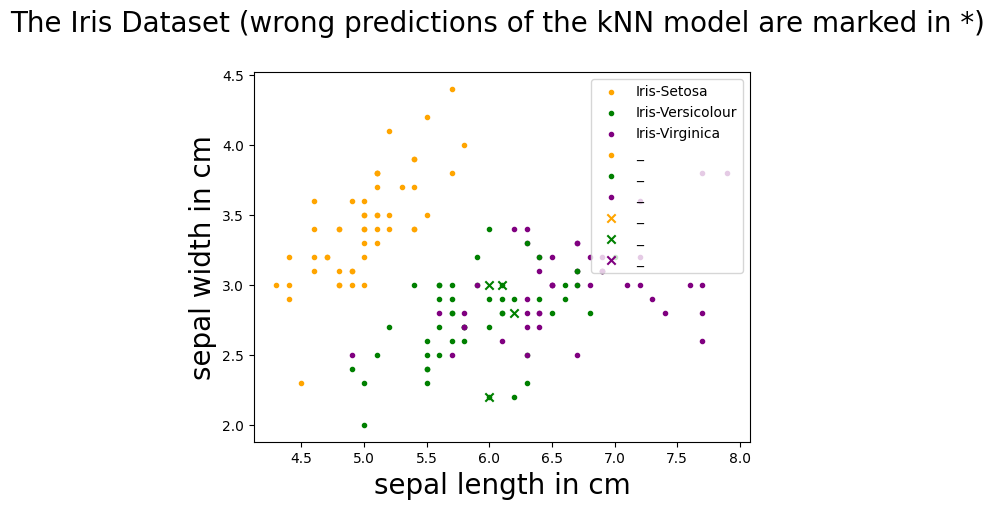

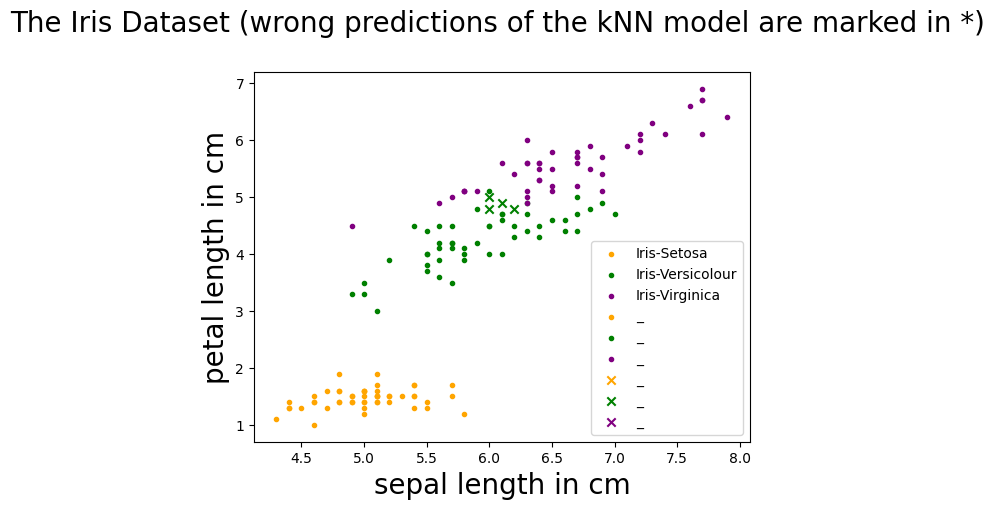

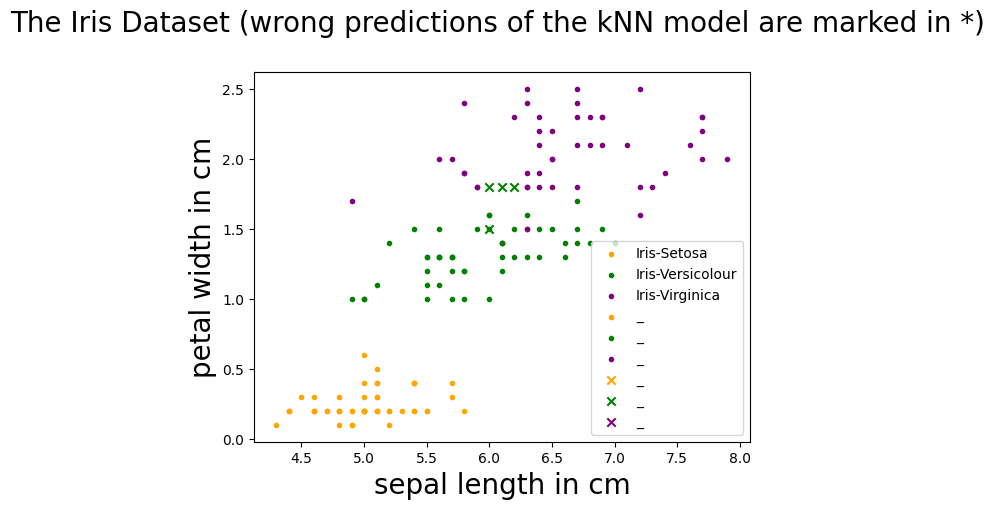

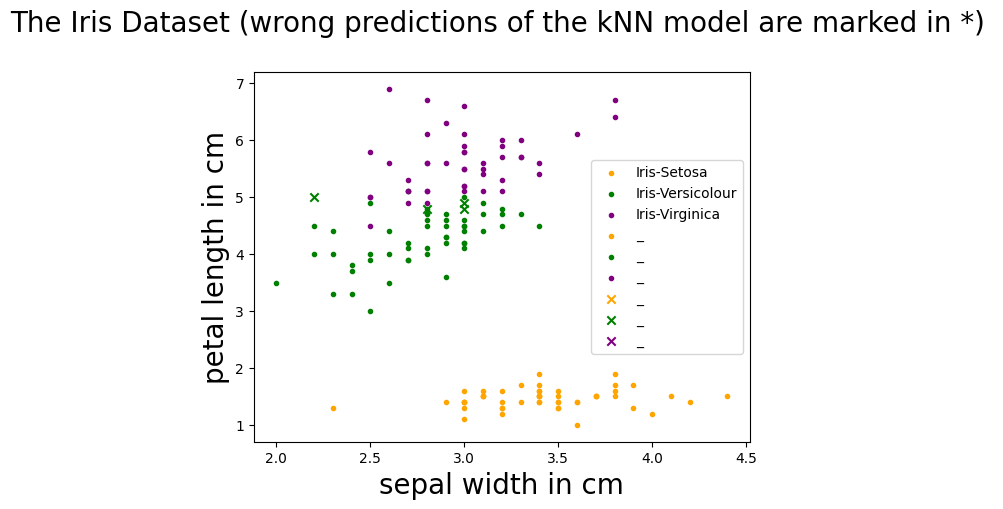

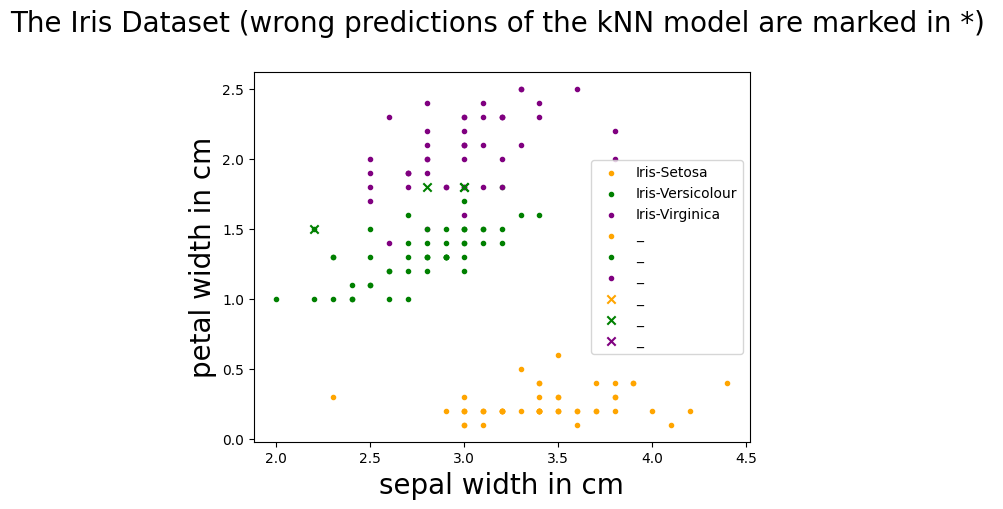

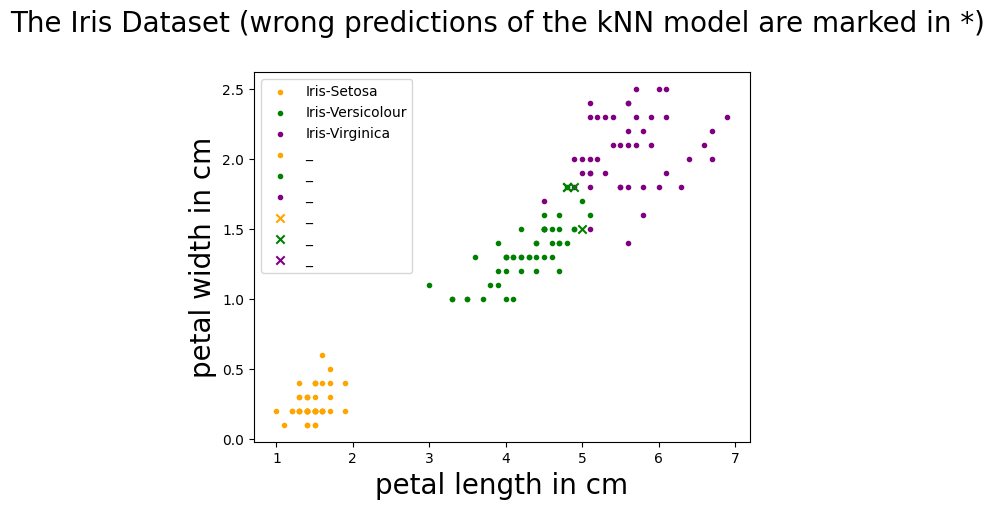

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import warnings


feature_names = ['sepal length in cm', 'sepal width in cm',
                 'petal length in cm', 'petal width in cm']

# Creating a method for plotting the 3 different classes by different colours
def plot_by_class(ax, data1, data2, labels, marker='.'):

  class_0 = labels == 0
  ax.scatter(data1[class_0], data2[class_0], color='orange', marker=marker, label='Iris-Setosa')

  class_1 = labels == 1
  ax.scatter(data1[class_1], data2[class_1], color='green', marker=marker, label='Iris-Versicolour')

  class_2 = labels == 2
  ax.scatter(data1[class_2], data2[class_2], color='purple', marker=marker, label='Iris-Virginica')

  return ax


# Setting up to plot only 2 of the 4 features at a time
# since it is impossible to create a 4D plot
for i in numpy.arange(0, iris_data.shape[1]):

  for j in numpy.arange(i, iris_data.shape[1]):


    if i != j:

      fig, ax = plt.subplots()

      # Plotting the training data
      # and colour coding by the labels
      ax = plot_by_class(ax, training_data[:, i], training_data[:, j], training_labels)

      # Plotting the test data
      # and differentiating between correct and incorrect predictions
      incorrect_pred = test_labels != test_predictions_kNN
      correct_pred = test_labels == test_predictions_kNN
      ax = plot_by_class(ax, test_data[correct_pred, i], test_data[correct_pred, j], test_labels[correct_pred])
      ax = plot_by_class(ax, test_data[incorrect_pred, i], test_data[incorrect_pred, j], test_predictions_kNN[incorrect_pred], marker='x')

      plt.xlabel(feature_names[i], size=20)
      plt.ylabel(feature_names[j], size=20)
      plt.title('The Iris Dataset (wrong predictions of the kNN model are marked in *) \n', size=20)
      print()

      with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        ax.legend(labels=['Iris-Setosa', 'Iris-Versicolour',
                        'Iris-Virginica', '_',
                        '_', '_', '_', '_', '_'])

        plt.show()

* The above plots show that the Iris Setosa is considerably different from the other two species in petal and sepal size. The Iris Versicolour and Virginica are more similar in petal and sepal size, and they are hardly distinguishable by sepal size alone.
* The kNN with k=5 and distance metric as minowski result in wrong predictions at the petal/sepal size boundaries between the Iris Versicolour and Virginica.

# Section 5 - Explore the effect of the kNN hyperparameters

* Try different values of k, i.e. the number of nearest neighbours, e.g. k = 1, 2, 5, 10, 20. What effect of k do you notice?
* Try a different distance metric. See https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

**Solution**

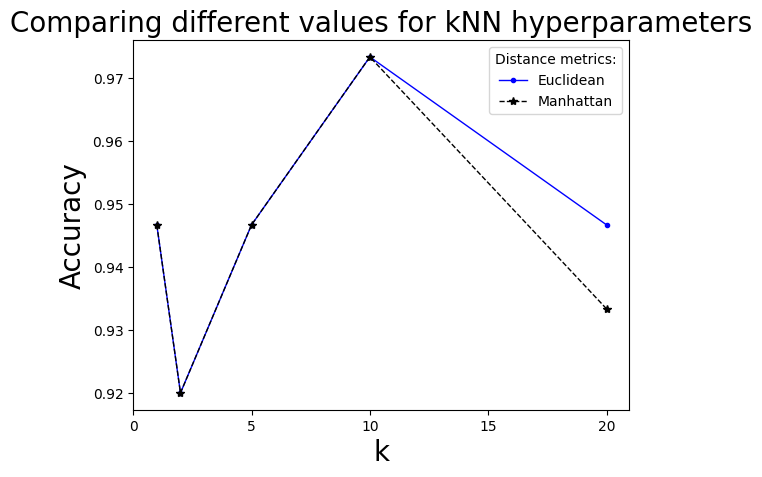

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

# Set up different values of k
ks = [1, 2, 5, 10, 20]

# Initialize variables
acc_euclidean = numpy.zeros(len(ks),)
acc_manhattan = numpy.zeros(len(ks),)
counter = 0


for k in ks:

  # Train and evaluate kNN model with Euclidean distance metric
  model_kNN_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  model_kNN_euclidean.fit(training_data, training_labels)
  acc_euclidean[counter] = accuracy_score(test_labels, model_kNN_euclidean.predict(test_data))



  # Train and evaluate kNN model with Manhattan distance metric
  model_kNN_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
  model_kNN_manhattan.fit(training_data, training_labels)
  acc_manhattan[counter] = accuracy_score(test_labels, model_kNN_manhattan.predict(test_data))

  counter += 1



# Plot data
plt.plot(ks, acc_euclidean, "b.-", linewidth=1, label='Euclidean')
plt.plot(ks, acc_manhattan, "k*--", linewidth=1, label='Manhattan')

plt.xlabel('k', size=20)
plt.xticks(numpy.arange(0, 21, step=5))
plt.ylabel('Accuracy', size=20)
plt.title('Comparing different values for kNN hyperparameters', size=20)
plt.legend(title='Distance metrics:')

plt.show()


As highlighted in Week 2 lecture, the number of neighbours and the distance metric of the kNN are its primary hyperparameters. Different hyperparamater settings might be optimal for different datasets. Thus, it is important to optimize them specifically for a given dataset.

# Section 6 - Train and evaluate a Bagging model

In [8]:
from sklearn.ensemble import BaggingClassifier
import math

# Set the max number of features to be used to split each node for each tree
max_feats = int(math.sqrt(training_data.shape[1]))

model_B = BaggingClassifier(n_estimators=100, max_features=max_feats, random_state=random_seed)
model_B.fit(training_data, training_labels)
test_predictions_B = model_B.predict(test_data)


print("\n What proportion of the Bagging test predictions were correct? %.2f " % accuracy_score(test_labels, test_predictions_B))


 What proportion of the Bagging test predictions were correct? 0.96 


# Section 7 - Explore the effect of the Bagging hyperparameters

* Try different numbers of base classifiers, i.e. trees, e.g. ntrees = 1, 10, 100, 1000. What effect of the number of trees do you notice?

**Solution**

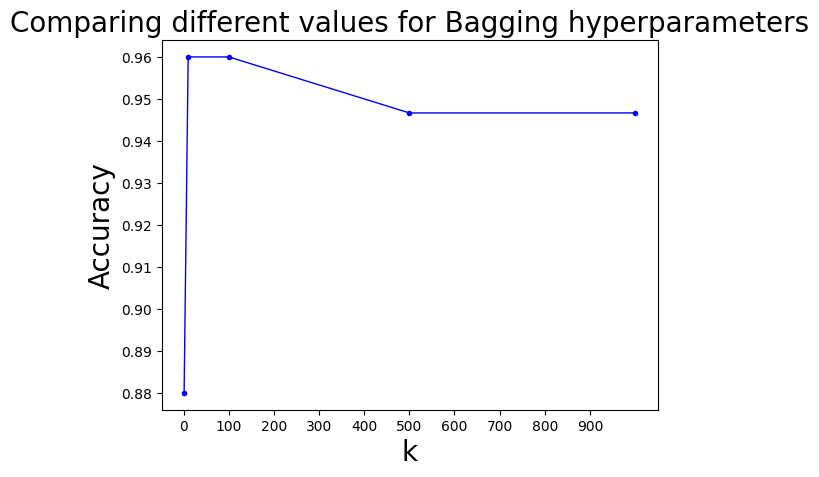

In [9]:
%matplotlib inline


# Set up different numbers of trees
ntrees = [1, 10, 100, 500, 1000]

# Initialize variables
acc_B = numpy.zeros(len(ntrees),)
counter = 0




for nt in ntrees:

  model_B = BaggingClassifier(n_estimators=nt, max_features=max_feats, random_state=random_seed)
  model_B.fit(training_data, training_labels)
  acc_B[counter] = accuracy_score(test_labels, model_B.predict(test_data))

  counter += 1



# Plot data
plt.plot(ntrees, acc_B, "b.-", linewidth=1)

plt.xlabel('k', size=20)
plt.xticks(numpy.arange(0, 1000, step=100))
plt.ylabel('Accuracy', size=20)
plt.title('Comparing different values for Bagging hyperparameters', size=20)

plt.show()



From the output above, all wrongly predicted data instances of the LR model are of class 1 (true label) and the model consistently predicts class 1 as the least likely class in each case. Class 1 represents the Iris Versicolour. Class 0 is Iris Setosa, and Class 2 is Iris Virginica.

# Section 8 - Explore split into training and test sets

* How was the Iris dataset split into training and test sets? See Section 2.
* Randomly split the dataset into training and test sets such that the ratio of instances is 80:20.
* What is the effect on performance of the Bagging algorithm?

**Solution**

In [10]:
# Randomly split the data into 80:20 to get the training set
train_set_ids, test_set_ids = train_test_split(all_ids, test_size=0.2, train_size=0.8,
                                 random_state=random_seed, shuffle=True)

training_data = iris_data[train_set_ids, :]
training_labels = iris_labels[train_set_ids]
test_data = iris_data[test_set_ids, :]
test_labels = iris_labels[test_set_ids]

print("Size of the training data:", training_data.shape)
print("Size of the ttest data:", test_data.shape)
print("A peek at the range of values of the features:", training_data)

Size of the training data: (120, 4)
Size of the ttest data: (30, 4)
A peek at the range of values of the features: [[6.1 3.  4.6 1.4]
 [7.7 3.  6.1 2.3]
 [5.6 2.5 3.9 1.1]
 [6.4 2.8 5.6 2.1]
 [5.8 2.8 5.1 2.4]
 [5.3 3.7 1.5 0.2]
 [5.5 2.3 4.  1.3]
 [5.2 3.4 1.4 0.2]
 [6.5 2.8 4.6 1.5]
 [6.7 2.5 5.8 1.8]
 [6.8 3.  5.5 2.1]
 [5.1 3.5 1.4 0.3]
 [6.  2.2 5.  1.5]
 [6.3 2.9 5.6 1.8]
 [6.6 2.9 4.6 1.3]
 [7.7 2.6 6.9 2.3]
 [5.7 3.8 1.7 0.3]
 [5.  3.6 1.4 0.2]
 [4.8 3.  1.4 0.3]
 [5.2 2.7 3.9 1.4]
 [5.1 3.4 1.5 0.2]
 [5.5 3.5 1.3 0.2]
 [7.7 3.8 6.7 2.2]
 [6.9 3.1 5.4 2.1]
 [7.3 2.9 6.3 1.8]
 [6.4 2.8 5.6 2.2]
 [6.2 2.8 4.8 1.8]
 [6.  3.4 4.5 1.6]
 [7.7 2.8 6.7 2. ]
 [5.7 3.  4.2 1.2]
 [4.8 3.4 1.6 0.2]
 [5.7 2.5 5.  2. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.  1.4 0.1]
 [4.7 3.2 1.3 0.2]
 [6.5 3.  5.8 2.2]
 [4.6 3.4 1.4 0.3]
 [6.1 3.  4.9 1.8]
 [6.5 3.2 5.1 2. ]
 [6.7 3.1 4.4 1.4]
 [5.7 2.8 4.5 1.3]
 [6.7 3.3 5.7 2.5]
 [6.  3.  4.8 1.8]
 [5.1 3.8 1.6 0.2]
 [6.  2.2 4.  1. ]
 [6.4 2.9 4.3 1.3]
 [6.5 3.  5

In Section 2, the Iris dataset was split into training and test sets 50:50. In the current section, the split is 80:20 which means that the training data is larger. The rule of the thumb is that more training data leads to better performance. However, there are factors that affect the efficacy of larger data, especially if the increase in data is not considerably high.

# Section 9 - Train and evaluate the kNN and Bagging models with scaled features

* Read the StandardScaler documentation (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Using the documentation above, compute scaled features from *iris_data* in Section 1 based on standard scaling.

* Train and evaluate a kNN and a Bagging model with the scaled features.

* What differences do you notice in the feature distribution and the results?

**Solution**

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



scaler.partial_fit(iris_data[train_set_ids, :])
scaled_train_data = scaler.transform(iris_data[train_set_ids, :])
print("\n A peek at the scaled training data features: \n"+str(scaled_train_data))
scaler.partial_fit(iris_data[test_set_ids, :])
scaled_test_data = scaler.transform(iris_data[test_set_ids, :])
print("\n A peek at the scaled training data features: \n"+str(scaled_test_data))

# train and evaluate a kNN model using the scaled features
model_kNN_scaled = KNeighborsClassifier(n_neighbors=5)
model_kNN_scaled.fit(scaled_train_data, training_labels)
test_predictions_kNN_scaled = model_kNN_scaled.predict(scaled_test_data)
print("\n What proportion of the kNN test predictions were correct? %.2f " % accuracy_score(test_labels, test_predictions_kNN))
print("\n What proportion of the kNN test predictions were correct? %.2f - SCALED FEATURES " % accuracy_score(test_labels, test_predictions_kNN_scaled))


# train and evaluate a Bagging model using the scaled features
model_B_scaled = BaggingClassifier(n_estimators=100, max_features=max_feats, random_state=random_seed)
model_B_scaled.fit(training_data, training_labels)
test_predictions_B_scaled = model_B_scaled.predict(test_data)
print("\n What proportion of the Bagging test predictions were correct? %.2f " % accuracy_score(test_labels, test_predictions_B))
print("\n What proportion of the Bagging test predictions were correct? %.2f - SCALED FEATURES " % accuracy_score(test_labels, test_predictions_B_scaled))


 A peek at the scaled training data features: 
[[ 0.83323818 -0.27219949  0.37797324  0.19490068]
 [ 0.95797443 -0.03754476  1.07648641  0.85334891]
 [-0.91306938 -1.68012791 -0.20412107 -0.20016826]
 [ 0.70850192  0.66641945  1.36753356  1.77517644]
 [-0.28938811 -1.21081844  0.20334495  0.19490068]
 [-0.41412436  1.60503839 -1.25189083 -1.25368544]
 [-1.03780563  0.19710998 -1.25189083 -1.25368544]
 [-0.66359687  2.54365734 -1.25189083 -1.38537509]
 [ 1.20744694  0.66641945  1.19290527  1.24841786]
 [-1.6614869  -0.03754476 -1.36830969 -1.25368544]
 [ 0.33429316 -0.74150897  0.84364869  0.58996962]
 [ 0.83323818 -0.74150897  0.96006755  0.98503856]
 [ 0.20955691 -0.03754476  0.84364869  0.85334891]
 [-0.66359687  1.13572892 -1.25189083 -1.25368544]
 [-0.78833312  0.66641945 -1.13547197 -0.8586165 ]
 [ 0.08482065 -0.74150897  0.26155438 -0.20016826]
 [-1.03780563  0.19710998 -1.25189083 -1.38537509]
 [ 2.08060071 -0.50685423  1.425743    0.98503856]
 [ 0.58376567 -0.27219949  0.37797